# Image Processing for SEM generated unspun carbon fiber images

We take SEM images of carbon fibers and apply semantic segmentation to extract fiber related information from the image files. We implement the template matching scheme in this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Importing image

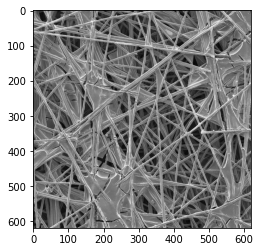

In [2]:
img_gray = cv2.imread('SEM_carbonfiber.png', 0)
imgplot = plt.imshow(img_gray, cmap = 'gray')

## Define parameters

In [3]:
template_size = 10 #defines the side length of the image
threshold = 0.25 #defines the threshold
template_posn = [120,90] #defines the position of the template

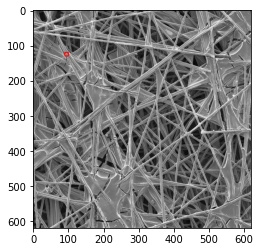

In [4]:
# This cell is for visual aid. This code views the template in the image
img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR) #converts image to RGB


start_point = (template_posn[1], template_posn[0]) # represents the top left corner of rectangle
end_point = (template_posn[1]+template_size, template_posn[0]+template_size) # represents bottom right corner 
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
cv2.rectangle(img_rgb, start_point, end_point, color, thickness)

imgplot = plt.imshow(img_rgb)

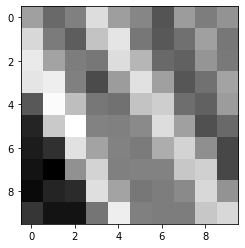

In [5]:
template = img_gray[template_posn[0]:template_posn[0]+template_size,template_posn[1]:template_posn[1]+template_size] #assign the teplate pixel values to an array
template_plot = plt.imshow(template, cmap='gray')

## Match template
Now we match the template to each tile in the image. The MatchTemplate function returns an ndarray that can be interpreted as the degree of similarity 

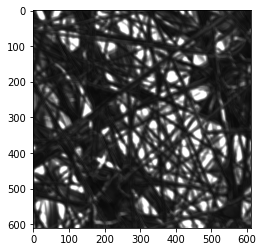

In [6]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF_NORMED)
res_plot = plt.imshow(res, cmap='gray') #display the match percentages as a heat map

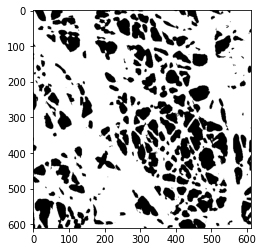

In [7]:
simple_mask = np.where(res<=threshold, 1, 0) #apply a binary filter 
simple_plt = plt.imshow(simple_mask, cmap='gray') #display the masked image 

## Varying the parameters
Now we vary the template size  and the threshold  and see how it affects our results 

In [9]:
#define a function that  does the template matching and returns  a binary filtered array 

def temp_match(roi_size, threshold, template_posn):
    template = img_gray[template_posn[0]:template_posn[0]+roi_size, template_posn[1]:template_posn[1]+roi_size]
    res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF_NORMED)
    simple_mask = np.where(res<=threshold, 1, 0)
    return simple_mask

## Vary the template size :

See the difference between having a template size of 10, 20 and 30 pixels. The smaller the template size, the more noise will be classified as actual feature. Vice versa, will cause loss of resolution to the actual segment boundaries  

Text(0.5, 1.0, 'original')

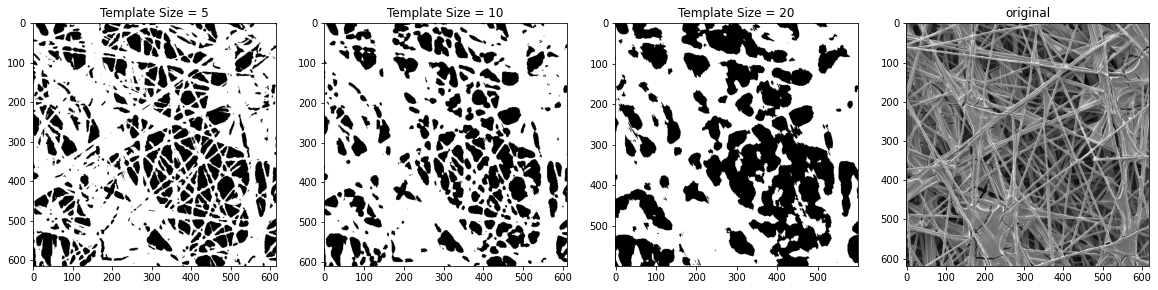

In [18]:
size = [5, 10, 20]
t = 0.25 
posn = [120,90]

fig, ax = plt.subplots(ncols=4, nrows = 1, figsize=(20,5))
for iter, roi in enumerate(size):
    mask = temp_match(roi, t, posn)
    ax[iter].imshow(mask, cmap='gray')
    ax[iter].set_title('Template Size = %i' %roi)
ax[3].imshow(img_gray, cmap='gray')
ax[3].set_title('original')

## Vary the threshold :
See the difference between having a threshold of 0.2 to 0.30. As we decrease the threshold, the criterion for being detected as the template segment becomes stricter

Text(0.5, 1.0, 'original')

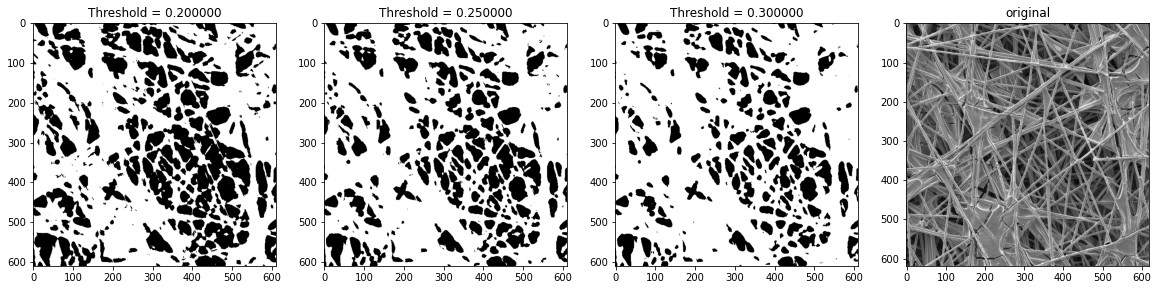

In [17]:
size = 10
t = [0.20, 0.25, 0.30] 
posn = [120,90]

fig, ax = plt.subplots(ncols=4, nrows = 1, figsize=(20,5))
for iter, threshold in enumerate(t):
    mask = temp_match(size, threshold, posn)
    ax[iter].imshow(mask, cmap='gray')
    ax[iter].set_title('Threshold = %f' %threshold)
ax[3].imshow(img_gray, cmap='gray')
ax[3].set_title('original')